In [1]:
# Import pustaka yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
# Langkah 1: Memuat dataset
data_classification = pd.read_csv("D:\\KULIAH\\SEMESTER 7\\MACHINE LEARNING\\teachingMLDL\\01. Machine Learning\\02. Week 2\\Dataset\\CitarumWater.csv")  # Memuat dataset
X = data_classification[['pH', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat']]  # Pilih fitur yang relevan
y = data_classification['Class']  # Pilih kolom target 'Class'

In [3]:
# Langkah 2: Membagi dataset menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split data menjadi 80% pelatihan, 20% pengujian

In [4]:
# ------------------- Logistic Regression -------------------

# Langkah 3: Inisialisasi dan latih model Logistic Regression
logistic_reg = LogisticRegression(max_iter=1000)  # Buat instance dari model LogisticRegression dengan iterasi maksimum 1000
logistic_reg.fit(X_train, y_train)  # Melatih model dengan data pelatihan

# Langkah 4: Membuat prediksi menggunakan Logistic Regression
y_pred_logistic = logistic_reg.predict(X_test)  # Membuat prediksi pada data pengujian

# Langkah 5: Menghitung probabilitas untuk evaluasi AUC-ROC
y_prob_logistic = logistic_reg.predict_proba(X_test)  # Mendapatkan probabilitas prediksi

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
# ------------------- Evaluasi Model -------------------

# Menghitung akurasi, presisi, recall, dan F1-score
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)  # Menghitung akurasi
precision_logistic = precision_score(y_test, y_pred_logistic, average='weighted')  # Menghitung presisi rata-rata tertimbang
recall_logistic = recall_score(y_test, y_pred_logistic, average='weighted')  # Menghitung recall rata-rata tertimbang
f1_logistic = f1_score(y_test, y_pred_logistic, average='weighted')  # Menghitung F1-score rata-rata tertimbang

# Menghitung AUC-ROC untuk multi-class
roc_auc_logistic = roc_auc_score(y_test, y_prob_logistic, multi_class='ovr')  # Menghitung AUC-ROC dengan metode one-vs-rest (ovr)

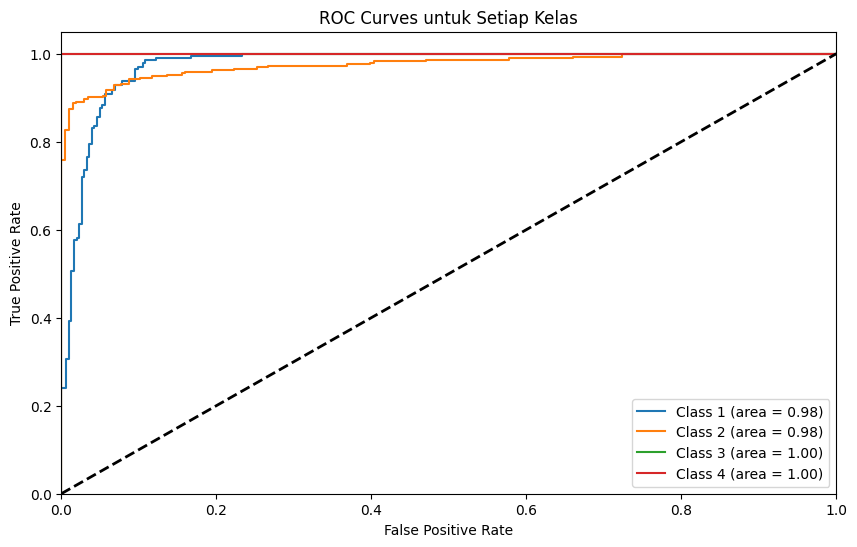

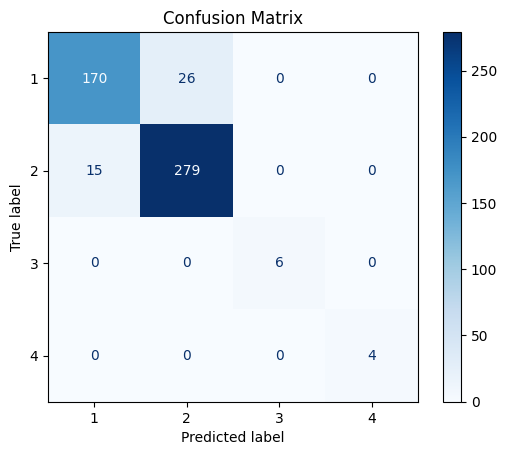

In [6]:
# ------------------- Visualisasi -------------------

# Langkah 6: Plot kurva ROC untuk masing-masing kelas
fpr = {}  # False Positive Rate untuk setiap kelas
tpr = {}  # True Positive Rate untuk setiap kelas
roc_auc = {}  # Nilai AUC untuk setiap kelas

# Hitung ROC untuk masing-masing kelas
for i in range(len(logistic_reg.classes_)):  
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob_logistic[:, i], pos_label=logistic_reg.classes_[i])  # Hitung ROC
    roc_auc[i] = roc_auc_score((y_test == logistic_reg.classes_[i]).astype(int), y_prob_logistic[:, i])  # Hitung AUC untuk tiap kelas

# Plot kurva ROC
plt.figure(figsize=(10, 6))  # Set ukuran plot
for i in range(len(logistic_reg.classes_)):  
    plt.plot(fpr[i], tpr[i], label=f'Class {logistic_reg.classes_[i]} (area = {roc_auc[i]:.2f})')  # Plot ROC curve untuk tiap kelas

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Plot garis diagonal sebagai baseline
plt.xlim([0.0, 1.0])  # Set batas sumbu X
plt.ylim([0.0, 1.05])  # Set batas sumbu Y
plt.xlabel('False Positive Rate')  # Label untuk sumbu X
plt.ylabel('True Positive Rate')  # Label untuk sumbu Y
plt.title('ROC Curves untuk Setiap Kelas')  # Judul plot
plt.legend(loc='lower right')  # Tampilkan legenda di sudut kanan bawah
plt.show()  # Tampilkan plot ROC

# Langkah 7: Tampilkan Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logistic)  # Menghitung confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_reg.classes_)  # Inisialisasi untuk menampilkan confusion matrix
disp.plot(cmap=plt.cm.Blues)  # Plot confusion matrix dengan warna biru
plt.title('Confusion Matrix')  # Tambahkan judul
plt.show()  # Tampilkan plot confusion matrix

In [7]:
# ------------------- Tampilkan Hasil Evaluasi -------------------

# Mengembalikan metrik evaluasi yang mencakup akurasi, presisi, recall, F1-score, dan AUC-ROC
overall_metrics = {
    'Accuracy': accuracy_logistic,  # Akurasi model
    'Precision': precision_logistic,  # Presisi rata-rata tertimbang model
    'Recall': recall_logistic,  # Recall rata-rata tertimbang model
    'F1-Score': f1_logistic,  # F1-Score rata-rata tertimbang model
    'AUC-ROC': roc_auc_logistic  # Nilai AUC-ROC keseluruhan
}

overall_metrics  # Tampilkan hasil evaluasi

{'Accuracy': 0.918,
 'Precision': 0.9180916260522818,
 'Recall': 0.918,
 'F1-Score': 0.9175691945017724,
 'AUC-ROC': 0.9877017466733755}